In [22]:
# explore.ipynb

In [23]:
import torch
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [24]:
# Grab local imports
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_root, "src"))

from data.load_data import get_train_dataset

In [25]:
train_dataset = get_train_dataset()
dataloader = DataLoader(train_dataset, shuffle=True)


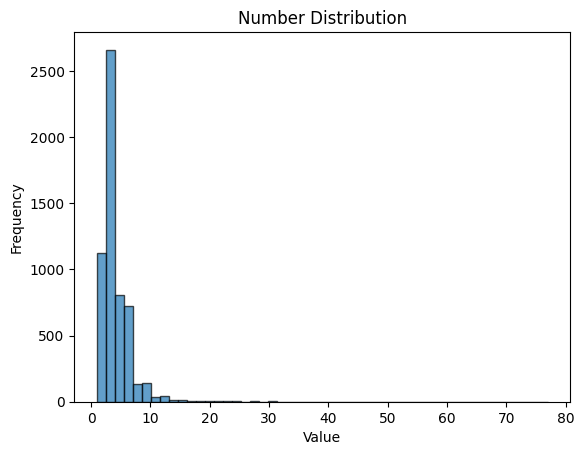

In [ ]:
all_labels = [int(x) for _, x in dataloader]
plt.hist(all_labels, bins=50, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number Distribution')

# Show plot
plt.show()

In [28]:
print(all_labels)

[4, 8, 2, 5, 2, 4, 4, 8, 2, 5, 2, 3, 4, 4, 7, 7, 3, 2, 4, 8, 5, 3, 5, 5, 3, 7, 5, 2, 5, 4, 5, 4, 5, 5, 4, 5, 3, 4, 2, 4, 9, 3, 5, 3, 3, 3, 5, 5, 2, 6, 4, 4, 2, 4, 2, 3, 1, 5, 2, 5, 3, 3, 3, 1, 3, 6, 3, 2, 4, 8, 3, 3, 3, 9, 7, 2, 5, 5, 24, 3, 3, 8, 3, 4, 3, 3, 4, 8, 2, 3, 4, 3, 5, 3, 5, 2, 7, 6, 2, 3, 2, 2, 4, 3, 3, 7, 5, 3, 4, 2, 4, 4, 3, 10, 2, 2, 6, 3, 12, 7, 5, 5, 4, 12, 3, 4, 3, 2, 10, 4, 5, 2, 5, 7, 3, 3, 2, 2, 4, 2, 4, 8, 4, 6, 5, 3, 2, 3, 3, 10, 3, 3, 4, 8, 13, 4, 7, 5, 7, 4, 3, 2, 5, 3, 4, 6, 7, 5, 2, 3, 5, 5, 3, 3, 3, 5, 2, 5, 3, 3, 5, 3, 7, 3, 6, 4, 2, 6, 4, 2, 6, 4, 8, 4, 4, 4, 2, 4, 6, 3, 6, 5, 4, 3, 5, 11, 4, 5, 3, 4, 3, 3, 3, 3, 3, 24, 22, 2, 2, 6, 6, 5, 5, 2, 3, 3, 4, 7, 2, 4, 7, 7, 4, 4, 2, 4, 4, 4, 3, 5, 4, 4, 2, 3, 4, 5, 6, 3, 7, 4, 4, 3, 6, 4, 3, 8, 3, 5, 2, 4, 3, 8, 3, 3, 6, 6, 2, 4, 7, 5, 4, 9, 8, 7, 3, 4, 7, 4, 3, 5, 2, 3, 3, 7, 4, 4, 4, 6, 2, 2, 1, 7, 2, 5, 4, 3, 4, 6, 2, 6, 5, 3, 2, 3, 3, 5, 8, 7, 5, 5, 4, 2, 12, 2, 6, 2, 5, 3, 2, 11, 3, 6, 6, 10, 8, 5, 4, 5, 4,

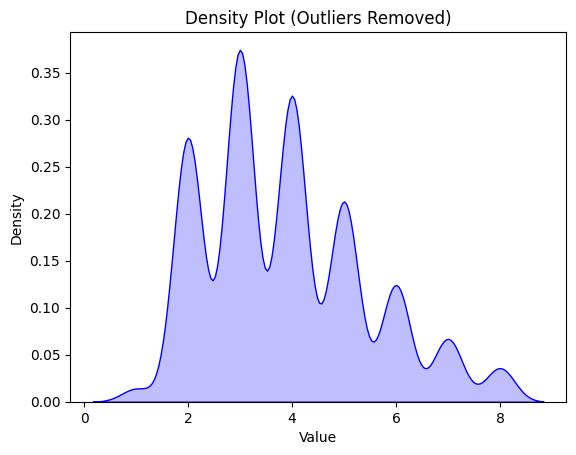

In [29]:
# Remove outliers using IQR
all_labels = np.array(all_labels)

Q1 = np.percentile(all_labels, 25)
Q3 = np.percentile(all_labels, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = all_labels[(all_labels >= lower_bound) & (all_labels <= upper_bound)]

# Plot density plot (KDE)
sns.kdeplot(filtered_data, fill=True, color='blue')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot (Outliers Removed)')

# Show plot
plt.show()
